In [1]:
# Frameworks para manipulação,análise de dados e para trabalhar com cálculos que envolvam álgebra linear.
import pandas as pd
import numpy as np

# Bibliotecas para trabalhar com gráficos de barras e gráficos de dispersão.
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('br_ibge_pib_municipio.csv', sep = ',', encoding = 'utf-8')

# Ajuste das casas decimais com o pandas.
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df.head(10)

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,1200500,2002,"125,410.00","2,474.00","122,936.00","42,357.00","8,335.00","20,708.00","51,537.00"
1,1300300,2002,"76,039.00","1,632.00","74,407.00","34,073.00","3,678.00","8,944.00","27,712.00"
2,1302108,2002,"13,798.00",324.00,"13,474.00","1,568.00",388.00,"1,203.00","10,315.00"
3,1400175,2002,"38,787.00",918.00,"37,868.00","4,671.00","2,536.00","4,567.00","26,095.00"
4,1502400,2002,"498,849.00","58,905.00","439,944.00","18,100.00","80,539.00","239,642.00","101,663.00"
5,1503705,2002,"81,756.00","2,760.00","78,995.00","17,832.00","10,288.00","13,104.00","37,771.00"
6,1506138,2002,"338,506.00","33,600.00","304,905.00","25,427.00","110,645.00","112,603.00","56,230.00"
7,1508357,2002,"45,152.00","1,627.00","43,524.00","25,532.00","1,804.00","6,961.00","9,228.00"
8,1702158,2002,"11,990.00",522.00,"11,469.00","3,029.00",651.00,"2,608.00","5,180.00"
9,1703008,2002,"18,001.00",482.00,"17,518.00","3,259.00",891.00,"3,034.00","10,335.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111400 entries, 0 to 111399
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_municipio       111400 non-null  int64  
 1   ano                111400 non-null  int64  
 2   pib                111326 non-null  float64
 3   impostos_liquidos  111326 non-null  float64
 4   va                 111326 non-null  float64
 5   va_agropecuaria    111326 non-null  float64
 6   va_industria       111326 non-null  float64
 7   va_servicos        111326 non-null  float64
 8   va_adespss         111326 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 7.6 MB


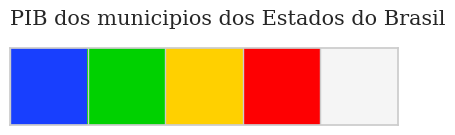

In [4]:
sns.set_theme(style='whitegrid')
# Definindo a paleta de cores
Paleta = [ '#183FFE','#00D100','#FFD000','#FE0002','#f5f5f5']
sns.palplot( Paleta )
plt.title('PIB dos municipios dos Estados do Brasil', loc='left',fontfamily='serif',fontsize=15, y=1.2);

In [5]:
df.rename(columns = {'id_municipio':'Código_Municipio','va':'Valor_Adicionado',
                    'va_agropecuaria':'Valor_Adicionado_Agropecuuaria',
                     'va_industria':'Valor_Adicionado_Industria','va_servicos':'Valor_Adicionado_Servicos',
                    'va_adespss':'Valor_Adicionado_Saude_Publica_Seguranca_Social', 'impostos_liquidos':
                    'Impostos','pib':'PIB','ano':'Anos'}, inplace = True)
df.head()

,Código_Municipio,Anos,PIB,Impostos,Valor_Adicionado,Valor_Adicionado_Agropecuuaria,Valor_Adicionado_Industria,Valor_Adicionado_Servicos,Valor_Adicionado_Saude_Publica_Seguranca_Social
0,1200500,2002,"125,410.00","2,474.00","122,936.00","42,357.00","8,335.00","20,708.00","51,537.00"
1,1300300,2002,"76,039.00","1,632.00","74,407.00","34,073.00","3,678.00","8,944.00","27,712.00"
2,1302108,2002,"13,798.00",324.00,"13,474.00","1,568.00",388.00,"1,203.00","10,315.00"
3,1400175,2002,"38,787.00",918.00,"37,868.00","4,671.00","2,536.00","4,567.00","26,095.00"
4,1502400,2002,"498,849.00","58,905.00","439,944.00","18,100.00","80,539.00","239,642.00","101,663.00"


<BarContainer object of 8 artists>

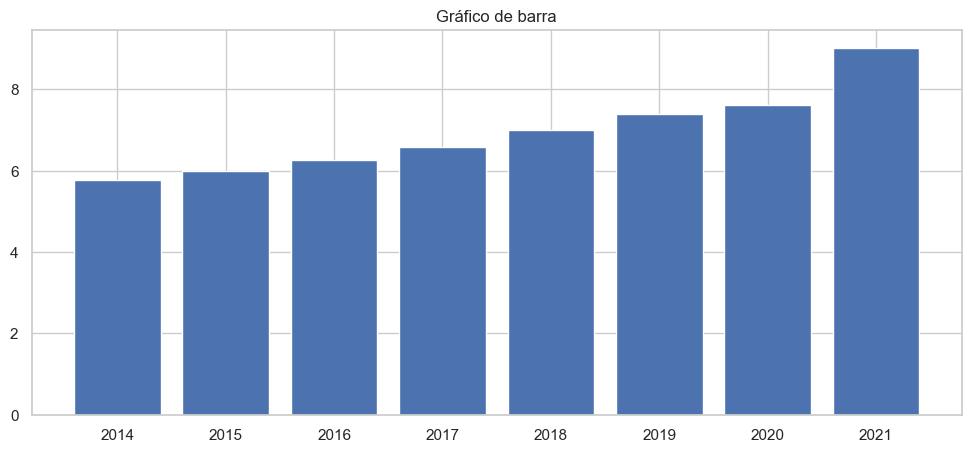

In [6]:
anos = df.groupby( by= 'Anos'
).agg( Sum =( 'PIB' ,'sum') ).tail(8) /10**9 

plt.figure( figsize=( 12,5) ) 
plt.title('Gráfico de barra')
plt.bar( anos.index, anos.Sum )

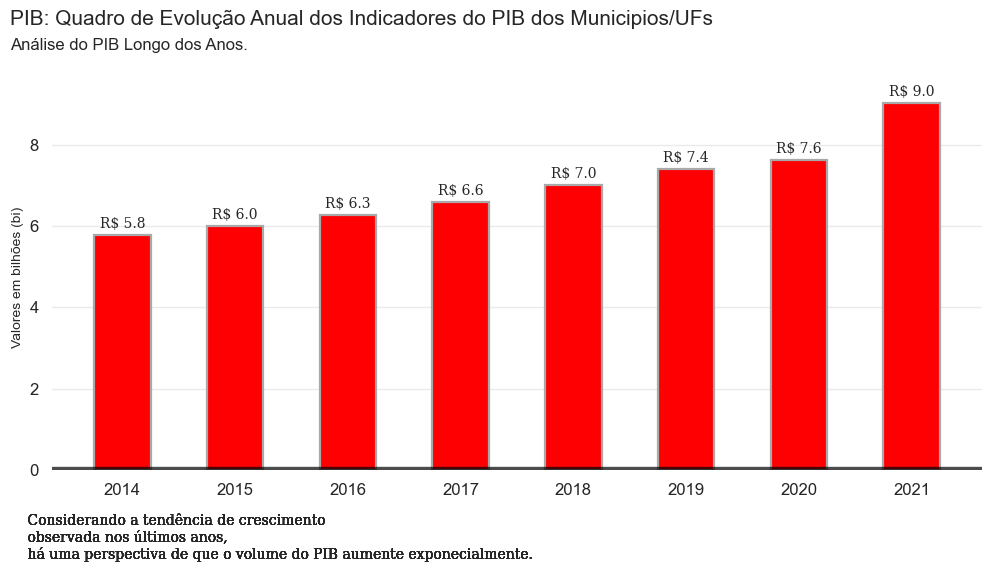

In [7]:
# Tamanho da figura
fig, ax = plt.subplots(figsize=( 12,5))

# Título e subtítulo
fig.text(0.09,1, 'PIB: Quadro de Evolução Anual dos Indicadores do PIB dos Municipios/UFs' , fontsize= 15), 
fig.text(0.09,0.95,'Análise do PIB Longo dos Anos.' , fontsize= 12)
           
# Gráfico de barras
bars = ax.bar( anos.index, anos.Sum, width=0.5 , edgecolor='darkgray', linewidth=1.6, color=Paleta[3])
           
# Remover todas as spines (bordas)
ax.spines[ 'top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
           
# Linha horizontal no eixo y=0
ax.axhline( y=0, color='black', linewidth=5.3, alpha=0.7)
           
# Configurar grid apenas no eixo y
ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.grid(axis='x', alpha=0)
           
# Adicionar rótulo ao eixo y
ax.set_ylabel('Valores em bilhões (bi)', size=10)
           
# Configurar o tamanho das marcas dos eixos
ax.tick_params(axis='both', which='major', labelsize=12)
           
# Adicionar os valores em cima das barras
# Iterando sobre cada barra do gráfico
for bar in bars:
   # Obtendo a altura da barra atual
   height = bar.get_height()
   # Adicionando uma anotação (valor da barra) no topo de cada barra
   ax.annotate( 
   # Formato do texto: 'R$' seguido do valor da barra com separadores de milhares e uma casa decimal
   'R$ {:,.1f}' .format (height),

   # Posição da anotação: centro da barra
   xy=(bar.get_x() + bar.get_width() / 2, height),

   # Deslocamento vertical e horizontal da anotação

   xytext=( 0 ,3),
   # Especificando o sistema de coordenadas do deslocamento da anotação
   textcoords= "offset points"
   ,
   # Alinhamento horizontal e vertical do texto
   ha= 'center' , va= 'bottom' ,
   # Tamanho da fonte do texto
   fontsize= 10 ,
   # Peso da fonte (leve)
   fontweight= 'light' ,
   # Família da fonte (serif)
   fontfamily= 'serif' )
   # insiths
   fig.text(0.09,-0.1, 
   '''
    Considerando a tendência de crescimento
    observada nos últimos anos,
    há uma perspectiva de que o volume do PIB aumente exponecialmente.
   '''
    ,
    fontsize=10, fontweight='light', fontfamily='serif')
plt.savefig('Analise-Anual.png', dpi=500, bbox_inches='tight')